<a href="https://colab.research.google.com/github/datagrad/DataScience-Projects/blob/main/Car_Price_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries to get started
import numpy as np
import pandas as pd

# Reading the data

In [3]:
# loading the data
df = pd.read_csv('https://raw.githubusercontent.com/datagrad/DataScience-Projects/main/CarPrice.csv')

# Checking the first five rows of the data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspecting the various aspects of the dataset

In [4]:
# Total number of rows and columns respectively
df.shape

(205, 26)

In [5]:
# Checking the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# The general idea of the numerical data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Checking for any null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Dropping the insignificant colummn - car_ID and viewing the first five rows of the data
df = df.drop(['car_ID'],axis=1)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Visualizing the data

In [9]:
# Importing libraries required for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# Creating two groups and dataframes based on data types of features
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

<Figure size 1440x1440 with 0 Axes>

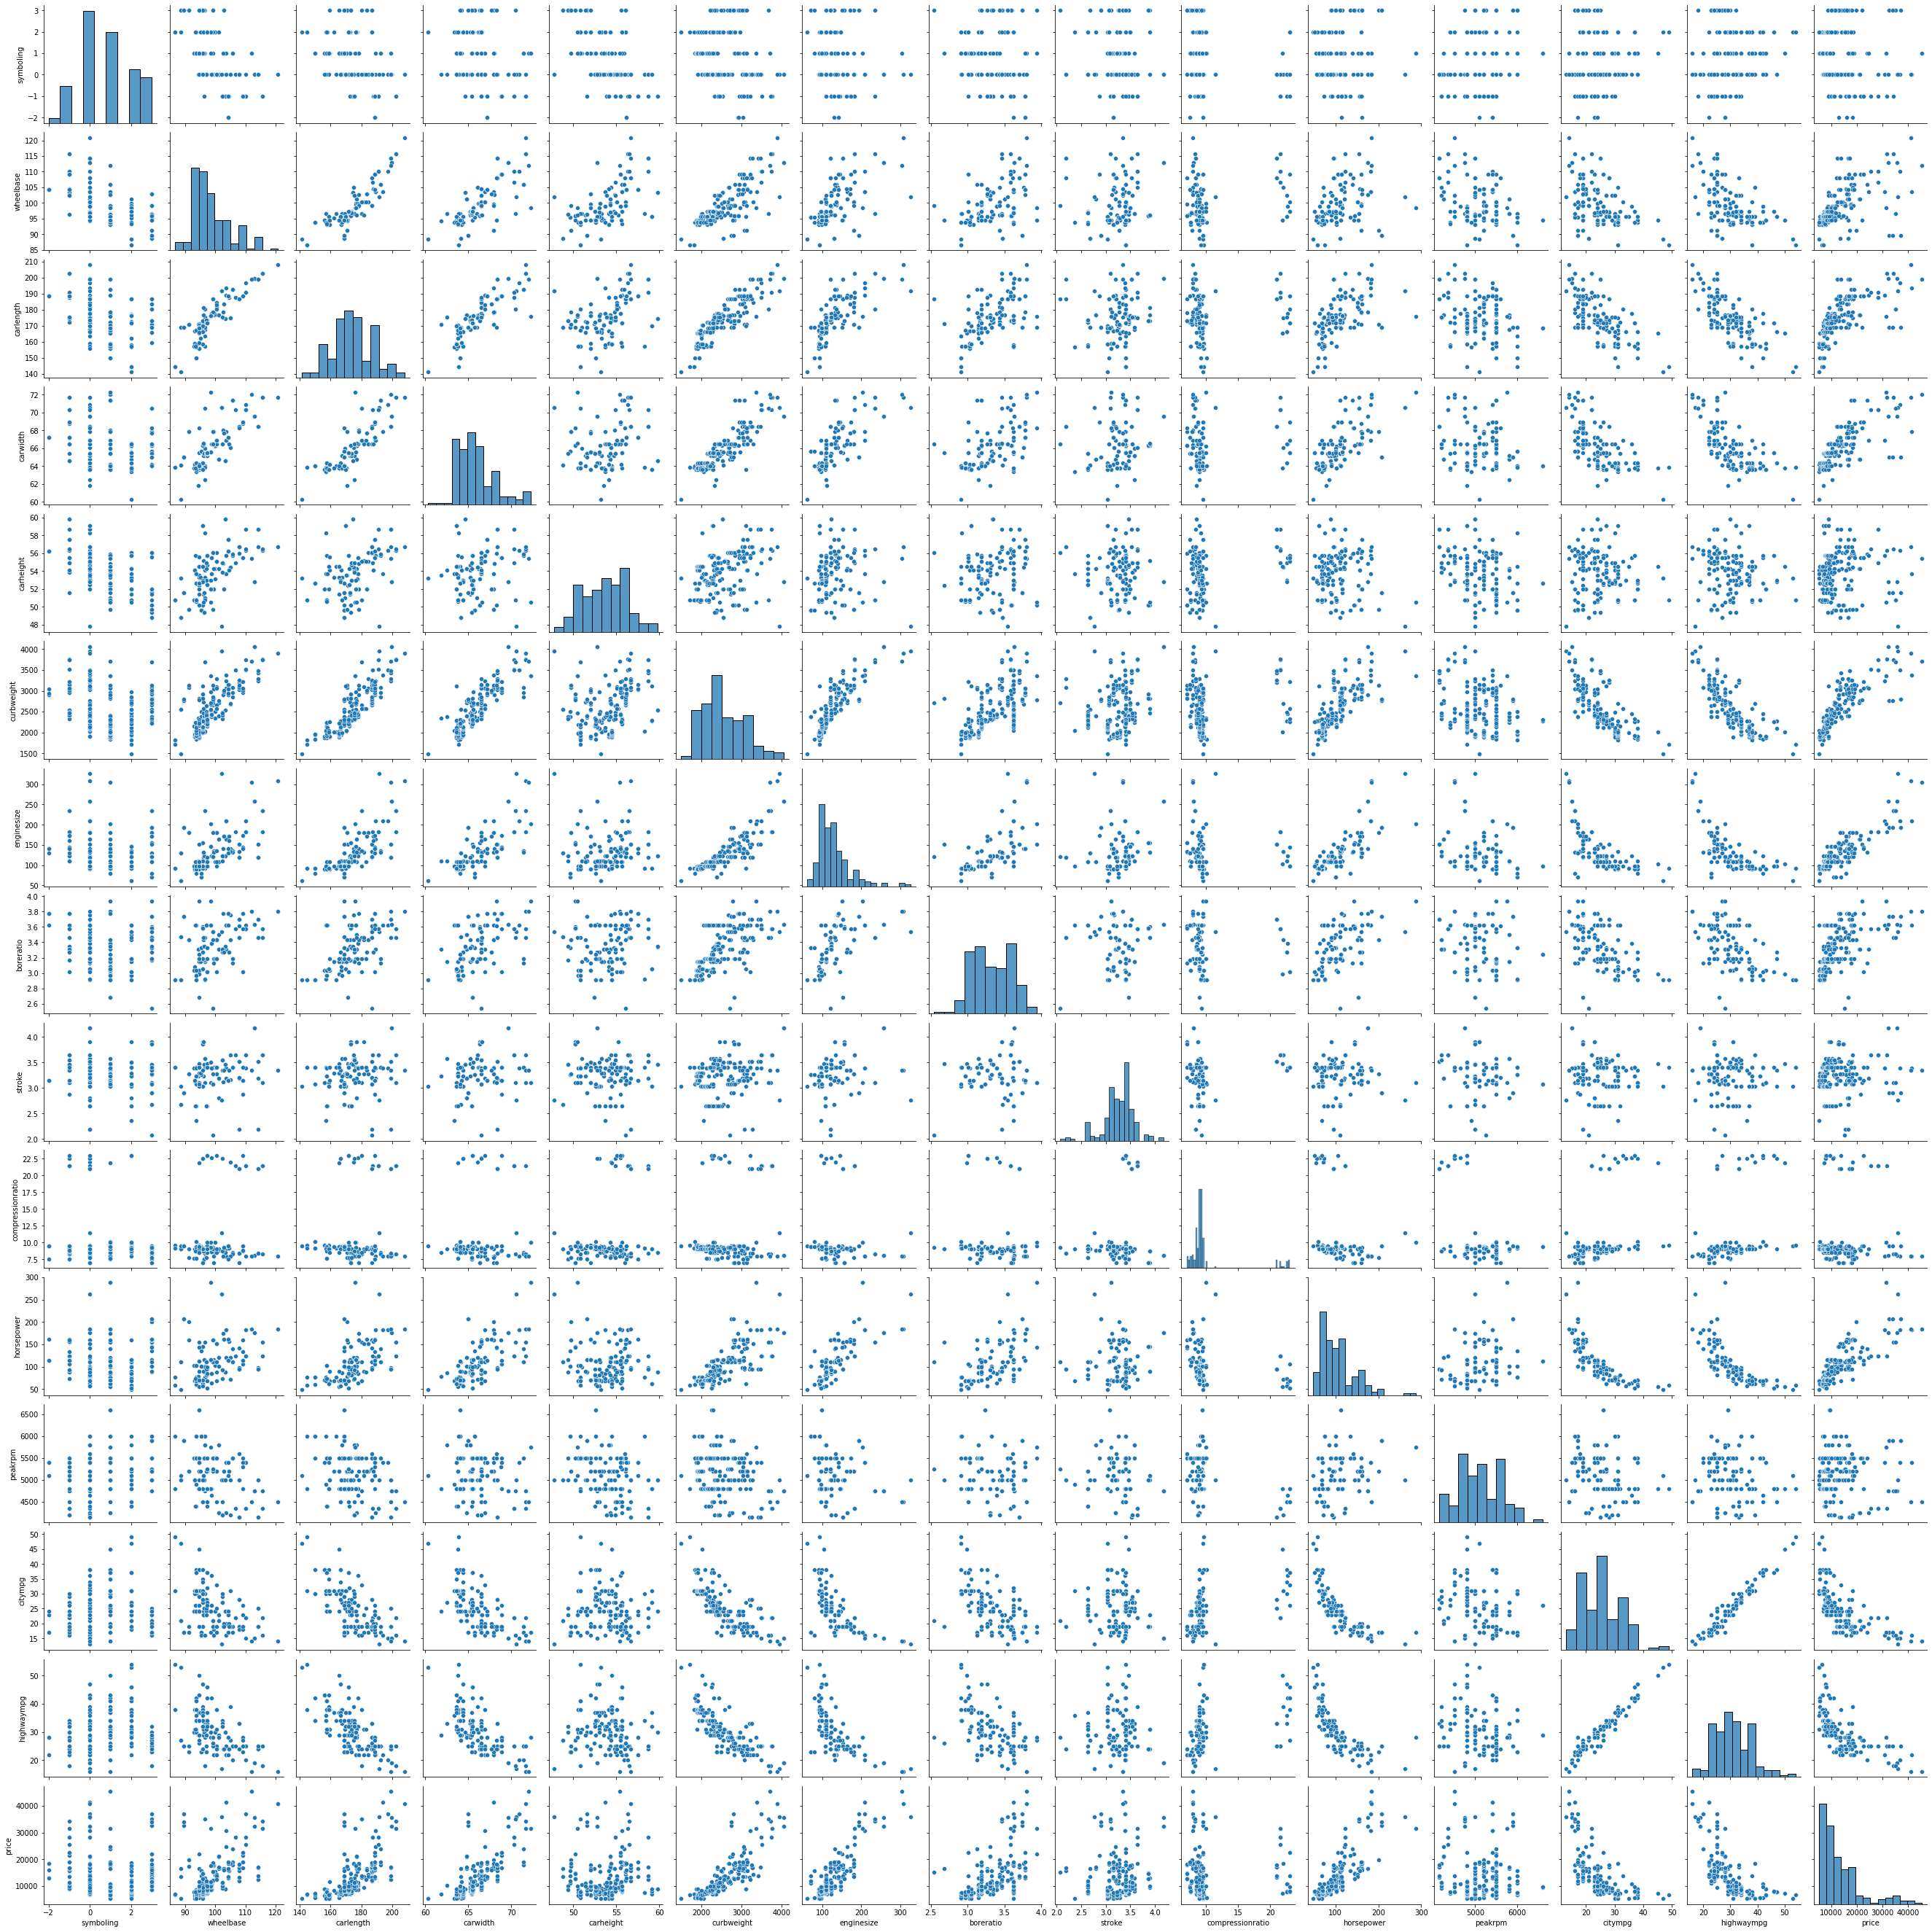

In [11]:
# Plotting scatter plot for numeric variables
plt.figure(figsize=(20,20)) 
sns.pairplot(df_num)
plt.show()

From the scatter plot we see that price is linearly correlated with wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg and highwaympg.

Hence we should consider linear regression for identifying major contributors of price in US car market.

#### Visualising the categorical variables

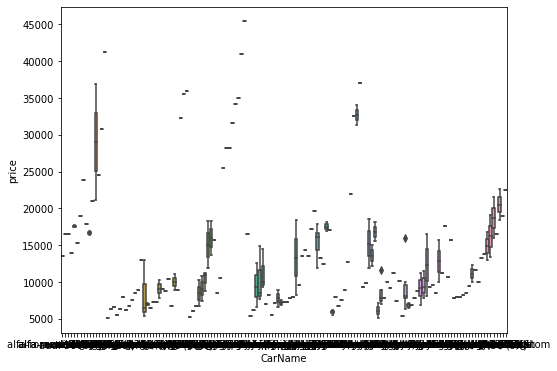

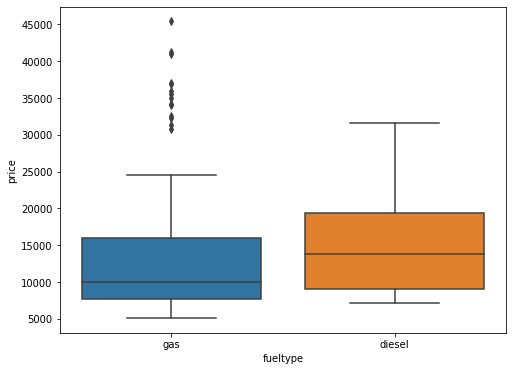

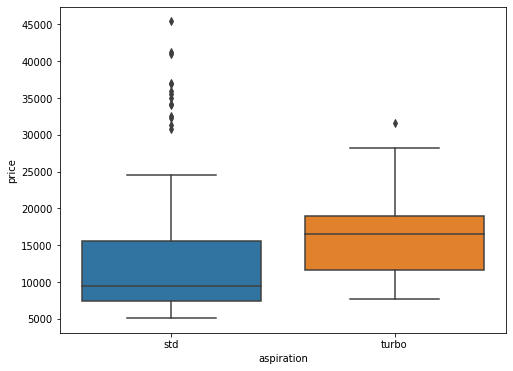

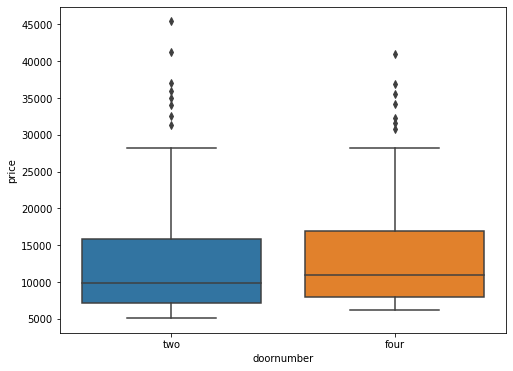

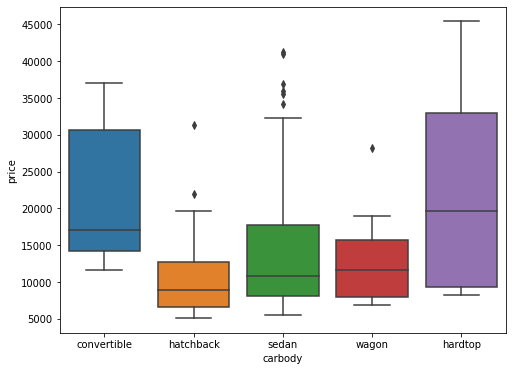

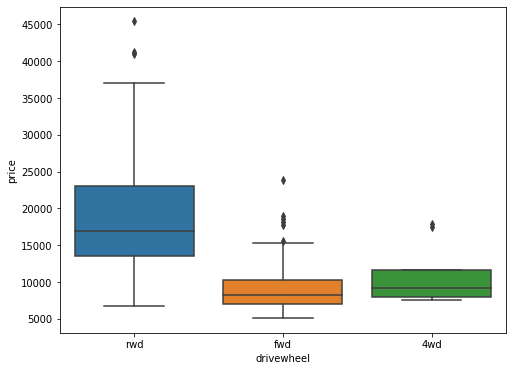

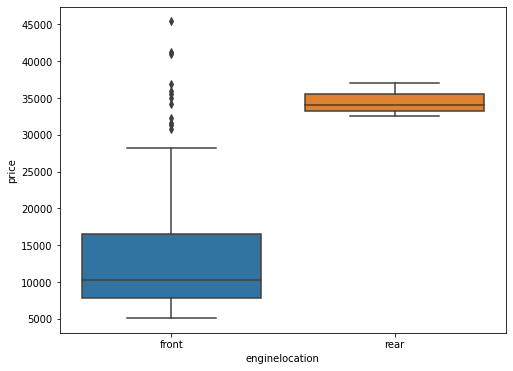

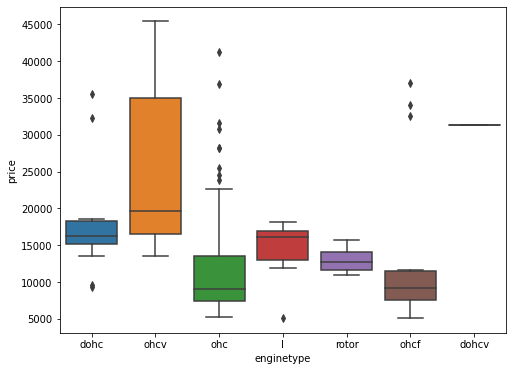

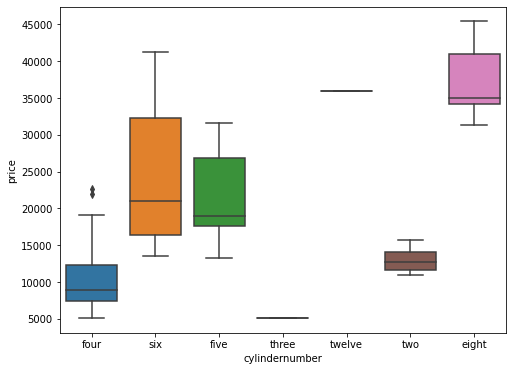

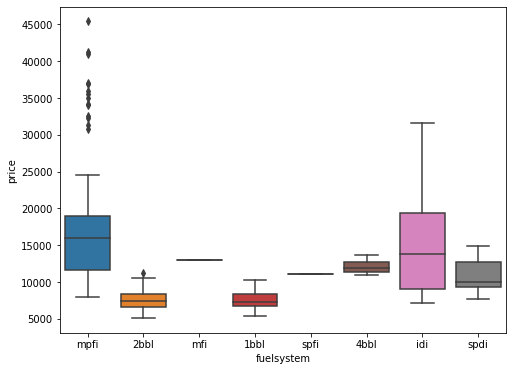

In [12]:
for count, item in enumerate(df_cat):
    plt.figure(figsize=(8,6))
    sns.boxplot(x = item, y = 'price', data = df)

Cars with -

    > diesel fuel type is costlier than gas, though there are some expected outliers
    > turbo is costlier than naturally aspirated ones
    > hardtop and convertible car body command a higher price than hatch, sedan or wagon
    > rear wheel drive is significantly costly than the forward ones
    > rear mounted engines are expensive than front mounted ones
    > ohcv engines are costly of the lot with a wider spread in price with no others to match
    > Any car above four cylinderical engines are costly as expected
    > idi and mpfi are in the upper price bracket than the rest fuel system

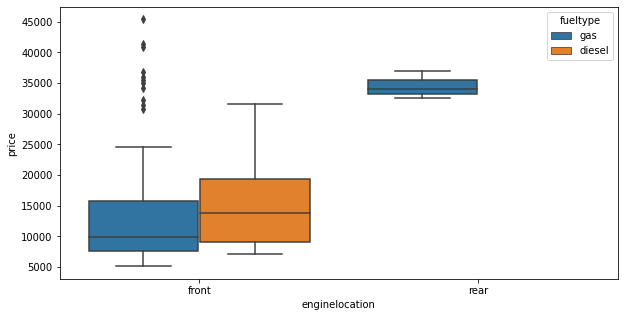

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'enginelocation', y = 'price', hue = 'fueltype', data = df)
plt.show()

We see that cars that have diesel fuel type, are turbo aspirated, with body type as convertible or hardtop with rear wheel drive and engine mounted in the rear are some of the factors which infulence the price positively. This is a common knowledge in automotive engineering and confirms that our analysis is true to the real world picture.

We also see an interesting fact that cars which have engine on the rear do not have diesel engines.

# Data Preparation & Feature Engineering

In [14]:
# Removing everything except car's company name
df['CarName'] = df['CarName'].str.split(' ',1).str[0]

# Checking the entries
df.CarName.value_counts()  

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
maxda           2
renault         2
mercury         1
toyouta         1
vokswagen       1
porcshce        1
Nissan          1
Name: CarName, dtype: int64

In [15]:
df1 = df.copy()

In [16]:
# There are a lot of spelling mistakes in automotive brand name
# Correcting the typos
df = df.replace({'CarName':{'toyouta':'toyota', 'Nissan':'nissan', 'vokswagen':'volkswagen', 'vw':'volkswagen', 
                             'porcshce':'porsche', 'maxda':'mazda'}})
df.CarName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CarName, dtype: int64

<Figure size 1440x432 with 0 Axes>

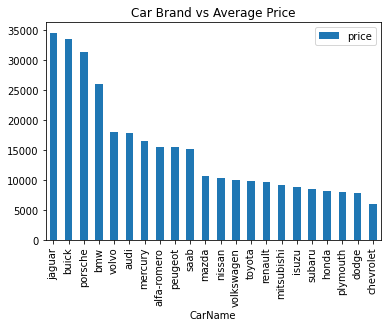

In [17]:
# Plotting car brands with their mean prices across their respective models
plt.figure(figsize=(20, 6))
df_make = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_make.plot.bar()
plt.title('Car Brand vs Average Price')
plt.show()

In [18]:
# Creating segment on the basis of brand value
bins = [0,15000,35000]
label =['Budget','Performance']
df['Cars_Category'] = pd.cut(df['price'],bins,right=False,labels=label)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Budget
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Performance
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Performance
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Budget
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Performance


In [19]:
# Selecting the categorical variables which have binary outcomes like yes/no.
varlist = ['fueltype','aspiration','doornumber','enginelocation']

# Function to map the outcome to either 0 or 1
def binary_map(x):
    return x.map({'gas':0,'diesel':1,'std':0,'turbo':1,'two':0,'four':1,'front':0,'rear':1})

# Applying the function to selected variable list
df[varlist] = df[varlist].apply(binary_map)

In [20]:
df.head()  # Checking the first five rows of the dataset

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Budget
1,3,alfa-romero,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Performance
2,1,alfa-romero,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Performance
3,2,audi,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Budget
4,2,audi,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Performance


Now we convert the remaining categorical variables with more than two levels to a numeric variable

In [21]:
# Pivoting cylindernumber and enginetype
pd.crosstab(df.cylindernumber, df.enginetype)

enginetype,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
cylindernumber,,,,,,,
eight,0,1,0,0,0,4,0
five,0,0,0,11,0,0,0
four,6,0,11,130,12,0,0
six,6,0,0,7,3,8,0
three,0,0,1,0,0,0,0
twelve,0,0,0,0,0,1,0
two,0,0,0,0,0,0,4


In [22]:
# dohcv has only one record throughout all cylindernumber. Hence could be a typo
df['enginetype'] = df['enginetype'].replace('dohcv','ohcv')

In [23]:
# Converting the categorical variable and storing it in new variable - bodytype
bodytype = pd.get_dummies(df['carbody'], prefix='carbody')

# Dropping the most insignificant feature from bodytype - hatchback as it's valuation & spread is the lowest
bodytype = bodytype.drop(['carbody_hatchback'], 1)

In [24]:
# Checking the converted data
bodytype.head()

,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,1,0


In [25]:
# Converting the remaining categorical variables and dropping the most insignificant feature based on value/spread

drive = pd.get_dummies(df['drivewheel'], prefix='drivewheel')
drive = drive.drop(['drivewheel_4wd'], 1)
engine = pd.get_dummies(df['enginetype'], prefix='enginetype')
engine = engine.drop(['enginetype_ohcf'], 1)
#cylinder = pd.get_dummies(df['cylindernumber'], prefix='cylindernumber')
#cylinder = cylinder.drop(['cylindernumber_three'], 1)
fuel = pd.get_dummies(df['fuelsystem'], prefix='fuelsystem')
fuel = fuel.drop(['fuelsystem_spfi'], 1)
car = pd.get_dummies(df['Cars_Category'], prefix='Cars_Category')
car = car.drop(['Cars_Category_Budget'], 1)

In [26]:
# Merging the converted categorical variables with the df dataframe
df = pd.concat([df,car,bodytype,drive,engine,fuel], axis=1)

In [27]:
# Dropping the categorical variables from df as it's redundant
df.drop(['CarName','carbody','drivewheel','enginetype','fuelsystem','Cars_Category'], axis=1, inplace=True)

In [28]:
# Confirming the data type of all colummns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   symboling                  205 non-null    int64  
 1   fueltype                   205 non-null    int64  
 2   aspiration                 205 non-null    int64  
 3   doornumber                 205 non-null    int64  
 4   enginelocation             205 non-null    int64  
 5   wheelbase                  205 non-null    float64
 6   carlength                  205 non-null    float64
 7   carwidth                   205 non-null    float64
 8   carheight                  205 non-null    float64
 9   curbweight                 205 non-null    int64  
 10  cylindernumber             205 non-null    object 
 11  enginesize                 205 non-null    int64  
 12  boreratio                  205 non-null    float64
 13  stroke                     205 non-null    float64

In [29]:
# Any dimension increase will also result in the increase of other dimensions
# Hence creating another feature - dimension, by multiplying carlength and carwidth
# Another point is carlength, carwidth and wheelbase are all highly correlated in terms of automotive engineering
# Hence we should try to minimize these to avoid multicollinearity
df['dimension'] = df['carlength'] * df['carwidth']

# Dropping highly correlated features as we have combined them to create another feature
df.drop(['carlength','carwidth','wheelbase'], 1, inplace=True)

In [30]:
# curbweight and horsepower are two highly correlated features
# However we can create power to weight ratio to remove multicolinearity
df['power2weight'] = df['horsepower']/df['curbweight']

# dropping highly correlated features as we have combined them to create another feature
df.drop(['horsepower','curbweight'], 1, inplace=True)

In [31]:
# converting cylindernumber to integer
df['cylindernumber'] = df['cylindernumber'].map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})
# creating engine displacement from bore, stroke and cylindernumber
df['displacement'] = (df['boreratio'] * df['stroke']) * df['cylindernumber']

# dropping boreratio and stroke
df.drop(['boreratio','stroke'], 1, inplace=True)

# Splitting the data into training and test set

In [32]:
# Importing the library to split the data
from sklearn.model_selection import train_test_split

In [33]:
# Splitting the data into train and test set
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state=100)

### Scaling - StandardScaler

In [34]:
# Importing the library to scale the variables
from sklearn.preprocessing import StandardScaler

In [35]:
# Initiating Standard Scaler
scaler = StandardScaler()

In [36]:
# Appling scaling to all the numeric columns except the converted categorical variables
var = ['symboling','carheight','enginesize','compressionratio','peakrpm','citympg','highwaympg','dimension',
       'power2weight','displacement','cylindernumber','price']
df_train[var] = scaler.fit_transform(df_train[var])

In [37]:
df_train.head() # Checking the dataset

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,cylindernumber,enginesize,compressionratio,peakrpm,citympg,highwaympg,price,Cars_Category_Performance,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,dimension,power2weight,displacement
122,0.170159,0,0,1,0,-1.134628,-0.351431,-0.660242,-0.172569,0.771349,0.839773,1.025419,-0.700201,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-0.650783,-0.948702,-0.634846
125,1.848278,0,0,0,0,-1.382026,-0.351431,0.637806,-0.146125,0.771349,-0.957048,-0.557490,1.151929,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.080297,1.287116,0.104193
166,0.170159,0,0,0,0,-0.392434,-0.351431,-0.660242,-0.172569,3.064983,0.091098,-0.269688,-0.452248,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,-0.546429,0.983000,-0.527586
1,1.848278,0,0,0,0,-1.959288,-0.351431,0.123485,-0.278345,-0.271212,-0.657578,-0.557490,0.442646,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,-0.526688,0.421626,-0.716381
199,-1.507960,0,1,1,0,1.627983,-0.351431,0.123485,-0.675002,-0.062699,-1.256518,-1.276993,0.757569,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1.056753,1.269468,-0.132050


In [38]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,cylindernumber,enginesize,compressionratio,peakrpm,citympg,highwaympg,price,Cars_Category_Performance,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,dimension,power2weight,displacement
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02
mean,5.473477e-17,0.090909,0.181818,0.559441,0.006993,5.450186e-16,-3.726623e-16,-4.308908e-17,7.259151e-17,6.009179e-16,2.655219e-16,1.599342e-16,1.925422e-16,0.272727,0.027972,0.020979,0.475524,0.132867,0.594406,0.349650,0.069930,0.062937,0.685315,0.069930,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,-1.068299e-15,4.945539e-16,-5.970360e-16
std,1.003515e+00,0.288490,0.387050,0.498199,0.083624,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,0.446927,0.165472,0.143818,0.501156,0.340624,0.492733,0.478536,0.255926,0.243703,0.466023,0.255926,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,1.003515e+00,1.003515e+00,1.003515e+00
min,-2.347020e+00,0.000000,0.000000,0.000000,0.000000,-2.371619e+00,-2.084351e+00,-1.566427e+00,-8.072216e-01,-2.043565e+00,-1.855458e+00,-1.996497e+00,-1.020394e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-2.487036e+00,-2.162919e+00,-1.794263e+00
25%,-6.689008e-01,0.000000,0.000000,0.000000,0.000000,-7.222984e-01,-3.514313e-01,-6.847340e-01,-3.841200e-01,-6.882361e-01,-9.570476e-01,-8.452912e-01,-7.072706e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7.495489e-01,-5.958963e-01,-6.348456e-01
50%,1.701590e-01,0.000000,0.000000,1.000000,0.000000,6.112865e-02,-3.514313e-01,-3.663447e-01,-2.783446e-01,1.458127e-01,-5.863749e-02,1.811338e-02,-3.674114e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.409528e-01,-2.338753e-01,-2.867864e-01
75%,1.701590e-01,0.000000,0.000000,1.000000,0.000000,7.414732e-01,-3.514313e-01,3.928914e-01,-1.725692e-01,7.713493e-01,8.397726e-01,8.095676e-01,4.381475e-01,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,7.078375e-01,4.242192e-01,3.569522e-01
max,1.848278e+00,1.000000,1.000000,1.000000,1.000000,2.287711e+00,6.580247e+00,4.923816e+00,3.423794e+00,3.064983e+00,3.535003e+00,3.327831e+00,3.632362e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,2.616263e+00,5.015584e+00,4.842899e+00


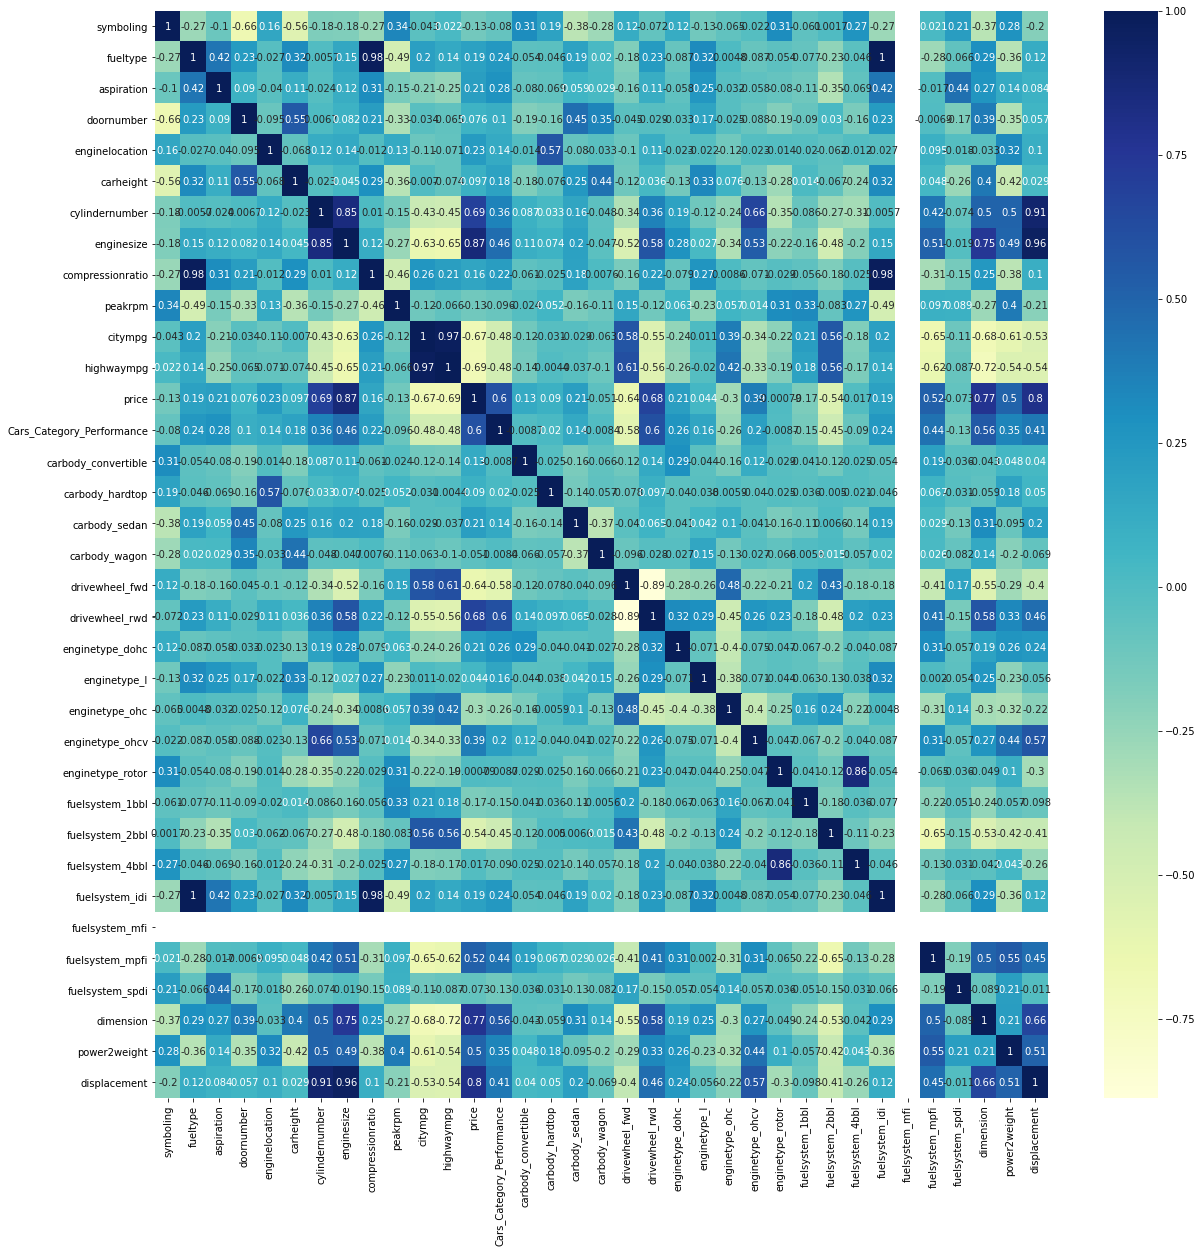

In [39]:
# Plotting a heat map of correlations among variables
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

We can see that few features have high positive correlation with price - 

    > cylindernumber, enginesize, Cars_Category_Performance, drivewheel_rwd, dimension, power2weight and displacement
    
And a few features are negatively correlated with price - 

    > fuelsystem_2bbl, drivewheel_fwd, citywheelmpg and highwaympg

Also we should note that few features are highly correlated to each other like -

    > dimension, enginesize, cylindernumber, power2weight and displacement

### Dividing the data into X and y sets for model

In [40]:
y_train = df_train.pop('price')
X_train = df_train

## Model

### RFE - First Model

In [41]:
# Importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Initiating Linear Regression
lr = LinearRegression()

# Running RFE with 10 best features
rfe = RFE(lr,11)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=11, step=1, verbose=0)

In [43]:
# Checking the ranking and inclusion of all variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 23),
 ('fueltype', False, 4),
 ('aspiration', True, 1),
 ('doornumber', False, 22),
 ('enginelocation', True, 1),
 ('carheight', False, 13),
 ('cylindernumber', False, 6),
 ('enginesize', True, 1),
 ('compressionratio', False, 5),
 ('peakrpm', False, 10),
 ('citympg', False, 21),
 ('highwaympg', False, 8),
 ('Cars_Category_Performance', True, 1),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 17),
 ('drivewheel_fwd', False, 9),
 ('drivewheel_rwd', False, 2),
 ('enginetype_dohc', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 12),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_1bbl', False, 11),
 ('fuelsystem_2bbl', False, 16),
 ('fuelsystem_4bbl', False, 15),
 ('fuelsystem_idi', False, 3),
 ('fuelsystem_mfi', False, 24),
 ('fuelsystem_mpfi', False, 14),
 ('fuelsystem_spdi', True, 1),
 ('dimension', False, 7),
 ('power2weight', False, 20),
 ('

In [44]:
# Copying the included variables
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'enginesize',
       'Cars_Category_Performance', 'carbody_convertible', 'carbody_hardtop',
       'enginetype_dohc', 'enginetype_l', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_spdi'],
      dtype='object')

In [45]:
# Checking the non-included variables
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'doornumber', 'carheight', 'cylindernumber',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'dimension',
       'power2weight', 'displacement'],
      dtype='object')

## Building First model using statsmodel for detailed statistics

In [46]:
# Creaing X_train dataframe using the variables selected in RFE model
X_train_rfe = X_train[col]

In [47]:
# Importing library & Adding a constant
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
#Running the linear model
lr = sm.OLS(y_train,X_train_rfe).fit() 

In [49]:
lr.summary() #Checking the statistic summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     82.49
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           2.43e-53
Time:                        16:32:33   Log-Likelihood:                -54.888
No. Observations:                 143   AIC:                             133.8
Df Residuals:                     131   BIC:                             169.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1217      0.044     -2.758      0.007      -0.209      -0.034
aspiration                    0.2650      0.104      2.559      0.012       0.060       0.470
enginelocation                1.0603      0.466      2.278      0.024       0.139       1.981
enginesize                    0.8959      0.045     19.929      0.000       0.807       0.985
Cars_Category_Performance     0.4730      0.089      5.312      0.000       0.297       0.649
carbody_convertible           0.6275      0.201      3.129      0.002       0.231       1.024
carbody_hardtop              -0.2307      0.266     -0.868      0.387      -0.757       0.295
enginetype_dohc              -0.5183      0.145     -3.567      0.001      -0.806      -0.231
enginetype_l                 -0.2111      0.136     -1.552      0.123      -0.480       0.058
enginetype_ohcv              -0.5841      0.158     -3.697      0.000      -0.897      -0.272
enginetype_rotor              1.1498      0.196      5.880      0.000       0.763       1.537
fuelsystem_spdi              -0.4137      0.184     -2.248      0.026      -0.778      -0.050
==============================================================================
Omnibus:                       63.856   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.425
Skew:                           1.598   Prob(JB):                     1.40e-58
Kurtosis:                       8.874   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Importing library for checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Creating a dataframe to store variable names used in the model and their respective VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,enginesize,2.10
0,const,2.02
9,enginetype_ohcv,1.69
1,aspiration,1.66
4,Cars_Category_Performance,1.63
2,enginelocation,1.56
6,carbody_hardtop,1.51
7,enginetype_dohc,1.43
11,fuelsystem_spdi,1.41
5,carbody_convertible,1.14


p-value for carbody_hardtop is higher than 0.05 which confirms that this feature is insignificant.

## Building Second model using statsmodels for details statistics

In [52]:
# Dropping carbody_hardtop from train data set
X_train_rfe.drop(['carbody_hardtop'], axis=1, inplace=True)

In [53]:
# Running the model
lr2 = sm.OLS(y_train,X_train_rfe).fit()

In [54]:
lr2.summary() #Checking the detailed statistic

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     90.83
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           3.59e-54
Time:                        16:32:33   Log-Likelihood:                -55.298
No. Observations:                 143   AIC:                             132.6
Df Residuals:                     132   BIC:                             165.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1279      0.044     -2.938      0.004      -0.214      -0.042
aspiration                    0.2677      0.103      2.589      0.011       0.063       0.472
enginelocation                0.8349      0.386      2.163      0.032       0.071       1.598
enginesize                    0.8938      0.045     19.930      0.000       0.805       0.983
Cars_Category_Performance     0.4772      0.089      5.373      0.000       0.302       0.653
carbody_convertible           0.6298      0.200      3.144      0.002       0.234       1.026
enginetype_dohc              -0.5138      0.145     -3.541      0.001      -0.801      -0.227
enginetype_l                 -0.2086      0.136     -1.535      0.127      -0.477       0.060
enginetype_ohcv              -0.5770      0.158     -3.661      0.000      -0.889      -0.265
enginetype_rotor              1.1523      0.195      5.899      0.000       0.766       1.539
fuelsystem_spdi              -0.4104      0.184     -2.233      0.027      -0.774      -0.047
==============================================================================
Omnibus:                       64.026   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.310
Skew:                           1.594   Prob(JB):                     7.39e-60
Kurtosis:                       8.961   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [55]:
# Creating a dataframe to store variable names used in the model and their respective VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,enginesize,2.09
0,const,1.97
8,enginetype_ohcv,1.68
1,aspiration,1.65
4,Cars_Category_Performance,1.63
6,enginetype_dohc,1.42
10,fuelsystem_spdi,1.41
5,carbody_convertible,1.13
7,enginetype_l,1.13
2,enginelocation,1.08


enginetype_l has a p-value 0.127 which is higher than 0.05.
Hence it's confirmed that this feature is also statistically insignificant

In [56]:
#Dropping enginetype_l
X_train_rfe.drop(['enginetype_l'], axis=1, inplace=True)

### Third Model

In [57]:
lr3 = sm.OLS(y_train,X_train_rfe).fit() # running the linear regression

In [58]:
lr3.summary() # checking the details statistic summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     99.65
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           1.11e-54
Time:                        16:32:33   Log-Likelihood:                -56.563
No. Observations:                 143   AIC:                             133.1
Df Residuals:                     133   BIC:                             162.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1365      0.043     -3.147      0.002      -0.222      -0.051
aspiration                    0.2309      0.101      2.284      0.024       0.031       0.431
enginelocation                0.8589      0.388      2.216      0.028       0.092       1.626
enginesize                    0.8919      0.045     19.794      0.000       0.803       0.981
Cars_Category_Performance     0.4651      0.089      5.230      0.000       0.289       0.641
carbody_convertible           0.6249      0.201      3.104      0.002       0.227       1.023
enginetype_dohc              -0.4900      0.145     -3.380      0.001      -0.777      -0.203
enginetype_ohcv              -0.5532      0.158     -3.509      0.001      -0.865      -0.241
enginetype_rotor              1.1615      0.196      5.919      0.000       0.773       1.550
fuelsystem_spdi              -0.3652      0.182     -2.003      0.047      -0.726      -0.004
==============================================================================
Omnibus:                       61.162   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.284
Skew:                           1.498   Prob(JB):                     1.50e-58
Kurtosis:                       8.976   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Checking the VIF value
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,enginesize,2.09
0,const,1.94
7,enginetype_ohcv,1.66
4,Cars_Category_Performance,1.62
1,aspiration,1.57
6,enginetype_dohc,1.41
9,fuelsystem_spdi,1.38
5,carbody_convertible,1.13
8,enginetype_rotor,1.08
2,enginelocation,1.07


## Residual Analysis of train data on Third Model

In [60]:
# Making predictions on the train data set
y_train_price = lr3.predict(X_train_rfe)

# Importing library for adjusted R-squared score
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price)

0.870850451514827

Text(0.5, 0, 'Errors')

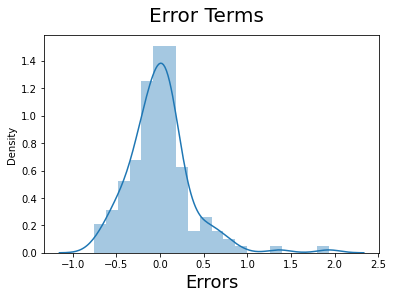

In [61]:
fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

## Making Predictions

In [62]:
#Appling scaling to all the numeric columns except the converted categorical variables
var = ['symboling','carheight','enginesize','compressionratio','peakrpm','citympg','highwaympg','dimension',
       'power2weight','displacement','cylindernumber','price']
df_test[var] = scaler.transform(df_test[var])

#### Dividing into X_test and y_test

In [63]:
y_test = df_test.pop('price')
X_test = df_test

In [64]:
#Adding a constant
X_test = sm.add_constant(X_test)

In [65]:
#Copying the columns used in training the model
X_test_new = X_test[X_train_rfe.columns]

In [66]:
#Making predictions
y_pred = lr3.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

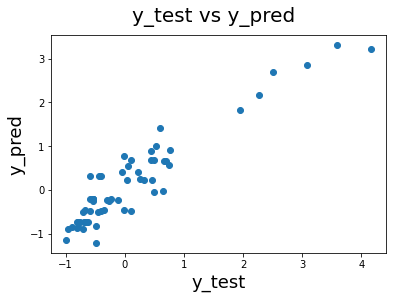

In [67]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)

In [68]:
# Checking the R-squared score on test data set
r2_score(y_test, y_pred)

0.8799750147509183

Equation for our best fitted line is

price = -0.1365 + 0.2309 * aspiration + 0.8589 * enginelocation + 0.8919 * enginesize + 0.4651 * Cars_Category_Performance + 0.6249 * carbody_convertible - 0.4900 * enginetype_dohc - 0.5532 * enginetype_ohcv + 1.1615 * enginetype_rotor - 0.3652 * fuelsystem_spdi

Also, we have got an adjusted R-squared score of 87.08 on train set and 88 on our test data